## Function Description
You’re working on a drug discovery project, testing combinations of three compounds to create a new medicine.

Each experiment is stored in initial_inputs.npy as a 3D array, where each row lists the amounts of the three compounds used. After each experiment, you record the number of adverse reactions, stored in initial_outputs.npy as a 1D array.

The goal is to minimise side effects; in this competition, it is framed as maximisation by optimising a transformed output (e.g. the negative of side effects). 

## Load and Prepare Data

In [1]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel
from scipy.stats.qmc import Sobol
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings(
    "ignore",
    category=ConvergenceWarning,
    module="sklearn"
)

# Load original dataset
X = np.load("../data/function_3/initial_inputs.npy")
y = np.load("../data/function_3/initial_outputs.npy")
d = X.shape[1] # dimension

print(f"original n: {len(X)}")
print()

# week 1 = initial

# week 2
x_new = np.array([[0.280078, 0.358459, 0.000012]])
y_new = np.array([-0.11535391403461093])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 3
x_new = np.array([[0.190246, 0.524753, 0.309124]])
y_new = np.array([-0.06865912396959274])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 4
x_new = np.array([0.999488, 0.332329, 0.786241])
y_new = np.array([-0.0864810398468685])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 5
x_new = np.array([[0.581613, 0.684627, 0.445001]])
y_new = np.array([-0.02799212623039464])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 6
x_new = np.array([[0.998179, 0.292630, 0.000238]])
y_new = np.array([-0.12269632306707264])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 7
x_new = np.array([[0.860965, 0.017327, 0.855007]])
y_new = np.array([-0.10300157849053969])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 8
x_new = np.array([[0.392371, 0.889015, 0.412670]])
y_new = np.array([-0.0556455956474890845])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 9
x_new = np.array([[0.565713, 0.989431, 0.637345]])
y_new = np.array([-0.11524740740237413])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 10
x_new = np.array([[0.635098, 0.979785, 0.516341]])
y_new = np.array([-0.042340399228346245])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 11
x_new = np.array([[0.622825, 0.760806, 0.371478]])
y_new = np.array([-0.047158344787564796])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 12
x_new = np.array([[0.652504, 0.762253, 0.488832]])
y_new = np.array([-0.05126903468737068])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 13
x_new = np.array([[0.575974, 0.744732, 0.438464]])
y_new = np.array([-0.014451581203361236])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# final submission
x_new = np.array([[0.632021, 0.763979, 0.435874]])
y_new = np.array([-0.00795007744150098])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

np.set_printoptions(suppress=True, precision=6)
print("X:\n", X)
print()
print("y:\n", y)
print()
print("n: ", len(y))
print()
idx_best = np.argmax(y)
print(f"current maximum:\nn: {idx_best+1}\ny: {y[idx_best]}\nX: {X[idx_best]}")

original n: 15

X:
 [[0.171525 0.343917 0.248737]
 [0.242114 0.644074 0.272433]
 [0.534906 0.398501 0.173389]
 [0.492581 0.611593 0.340176]
 [0.134622 0.219917 0.458206]
 [0.345523 0.94136  0.269363]
 [0.151837 0.439991 0.990882]
 [0.645503 0.397143 0.919771]
 [0.746912 0.284196 0.2263  ]
 [0.170477 0.697032 0.149169]
 [0.220549 0.297825 0.343555]
 [0.666014 0.671985 0.246295]
 [0.046809 0.23136  0.770618]
 [0.600097 0.725136 0.066089]
 [0.965995 0.86112  0.566829]
 [0.280078 0.358459 0.000012]
 [0.190246 0.524753 0.309124]
 [0.999488 0.332329 0.786241]
 [0.581613 0.684627 0.445001]
 [0.998179 0.29263  0.000238]
 [0.860965 0.017327 0.855007]
 [0.392371 0.889015 0.41267 ]
 [0.565713 0.989431 0.637345]
 [0.635098 0.979785 0.516341]
 [0.622825 0.760806 0.371478]
 [0.652504 0.762253 0.488832]
 [0.575974 0.744732 0.438464]
 [0.632021 0.763979 0.435874]]

y:
 [-0.112122 -0.087963 -0.111415 -0.034835 -0.048008 -0.110621 -0.398926
 -0.113869 -0.131461 -0.09419  -0.046947 -0.105965 -0.118048 -0

## Visualisation

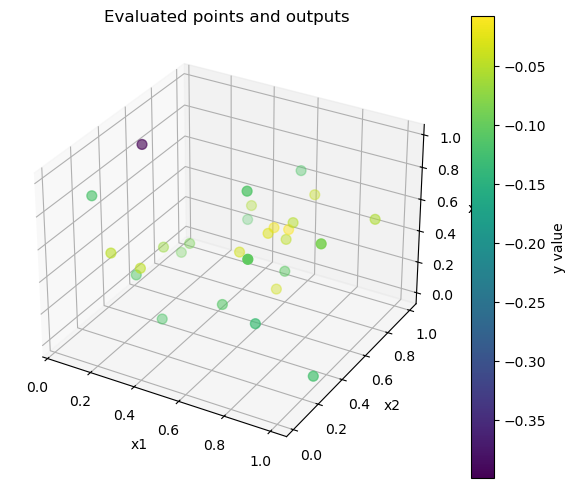

In [2]:
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap='viridis', s=50)
plt.colorbar(sc, label='y value')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.title('Evaluated points and outputs')
plt.show()

## Bayesian Optimisation

In [3]:
# GP setup
kernel = (ConstantKernel(1.0, (1e-2, 1e2)) *
          Matern(length_scale=np.ones(d), nu=1.5) +
          WhiteKernel(noise_level=5e-3, noise_level_bounds=(1e-6, 1e-1)))

gp = GaussianProcessRegressor(kernel=kernel,
                              n_restarts_optimizer=8,
                              normalize_y=True,
                              random_state=42)
gp.fit(X, y)

# Sobol candidates in [0,1]^d
sob = Sobol(d=d, scramble=True, seed=None)
C = sob.random_base2(m=18) 

# GP predictions
mu, sigma = gp.predict(C, return_std=True)

# Expected Improvement (EI)
y_best = np.max(y)
xi = 0.01
imp = mu - y_best - xi
Z = imp / sigma
ei = imp * norm.cdf(Z) + sigma * norm.pdf(Z)

# Pick next query
x_next = C[np.argmax(ei)]

print(f"Next point to query: {x_next[0]:.6f}-{x_next[1]:.6f}-{x_next[2]:.6f}")

Next point to query: 0.867809-0.085423-0.096559
